# Campus Recruitment
**Academic and Employability Factors influencing placement**

This data set consists of Placement data of students in a campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students.          
Through this analysis we would figure out questions like: Which factor influenced a candidate in getting placed? Does percentage matters for one to get placed? Which degree specialization is much demanded by corporate?

I will be using python libraries like numpy, pandas for data analysis and matplotlib, seaborn for data vizualisation.


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('Imported')

Imported


Firstly we will load data into a pandas dataframe.

In [44]:
pdf=pd.read_csv('placement.csv')
# help(pd.read_csv)
# print(pdf.describe())
pdf

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


## Data Cleaning
We will drop any rows with all columns empty.

In [45]:
pdf.dropna(how='all')
print(f'Shape of the dataset:{pdf.shape}')
pdf.describe().drop(['sl_no'],axis=1)

Shape of the dataset:(215, 15)


,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


Let's calculate the statistics of the data that we have to understand it a bit more.
## At first let's look at the Gender Distribution:

M    139
F     76
Name: gender, dtype: int64


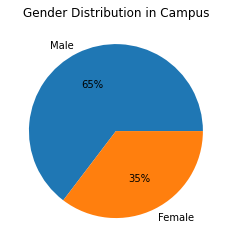

In [46]:
print(pdf.gender.value_counts())
n=pdf.gender.value_counts(normalize=True)*100
plt.title('Gender Distribution in Campus')
lb=['Male','Female']
plt.pie(n,labels=lb,autopct='%.0f%%');

# Genderwise Stats

In [47]:
gdf=pdf.groupby('gender').mean().drop(['sl_no','salary'],axis=1)
gdf

,ssc_p,hsc_p,degree_p,etest_p,mba_p
gender,,,,,
F,68.310921,66.646842,68.090000,70.590658,64.643553
M,66.752518,66.161655,65.429856,72.926115,60.984892


Let's plot this statistics of academic points in a line chart.

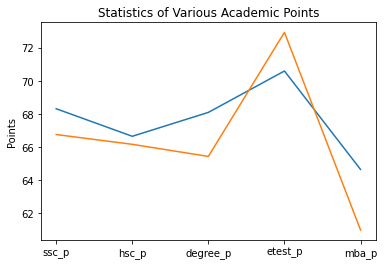

In [14]:
plt.title("Statistics of Various Academic Points")
plt.ylabel("Points")
plt.plot(gdf.iloc[0],label='Female')
plt.plot(gdf.iloc[1],label='Male');


# Genderwise Placement Stats

In [20]:
k=pdf.groupby('gender').status.value_counts()
print(f'No of students placed and not placed in each gender:\n{k}')

No of students placed and not placed in each gender:
gender  status    
F       Placed         48
        Not Placed     28
M       Placed        100
        Not Placed     39
Name: status, dtype: int64


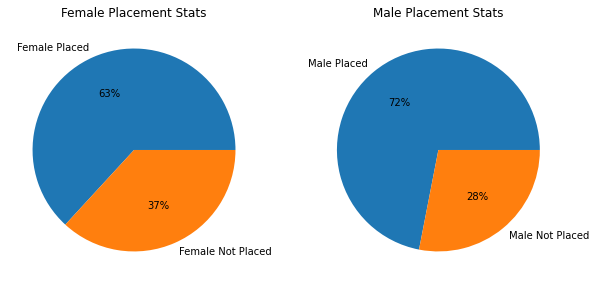

In [30]:
f=pdf[pdf.gender=='F'].status.value_counts()
lb=['Female Placed','Female Not Placed']

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.title('Female Placement Stats')
plt.pie(f,labels=lb,autopct='%.0f%%');

m=pdf[pdf.gender=='M'].status.value_counts()
lb=['Male Placed','Male Not Placed']

plt.subplot(122)
plt.title('Male Placement Stats')
plt.pie(m,labels=lb,autopct='%.0f%%');

Let us look at the percentage of students placed based on the different degrees they had:

In [17]:
t=pdf.groupby('degree_t').status.value_counts(normalize=True)*100
print(f'Placement Stats Of Different Degrees:\n{t}')

Placement Stats Of Different Degrees:
degree_t   status    
Comm&Mgmt  Placed        70.344828
           Not Placed    29.655172
Others     Not Placed    54.545455
           Placed        45.454545
Sci&Tech   Placed        69.491525
           Not Placed    30.508475
Name: status, dtype: float64


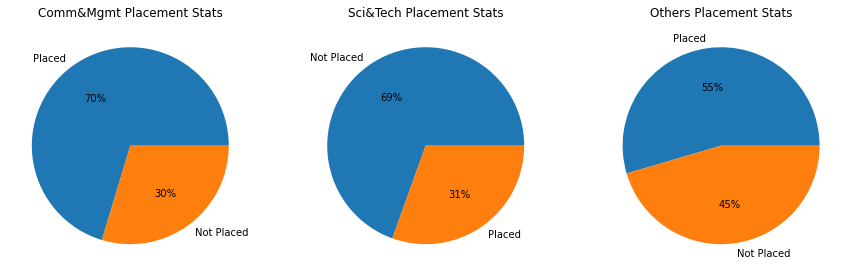

In [19]:
plt.figure(figsize=(15,5))

lb=['Placed','Not Placed']

plt.subplot(131)
plt.title('Comm&Mgmt Placement Stats')
plt.pie(t.iloc[:2],labels=lb,autopct='%.0f%%');

plt.subplot(132)
plt.title('Sci&Tech Placement Stats')
plt.pie(t.iloc[4:],labels=['Not Placed','Placed'],autopct='%.0f%%');

plt.subplot(133)
plt.title('Others Placement Stats')
plt.pie(t.iloc[2:4],labels=lb,autopct='%.0f%%');

Let us now look into the percentage students placed and not placed based their work experience:

In [22]:
we=pdf.groupby('workex').status.value_counts(normalize=True)*100
print(f'Percentage students placed and not placed based their work experience:\n{we}')

Percentage students placed and not placed based their work experience:
workex  status    
No      Placed        59.574468
        Not Placed    40.425532
Yes     Placed        86.486486
        Not Placed    13.513514
Name: status, dtype: float64


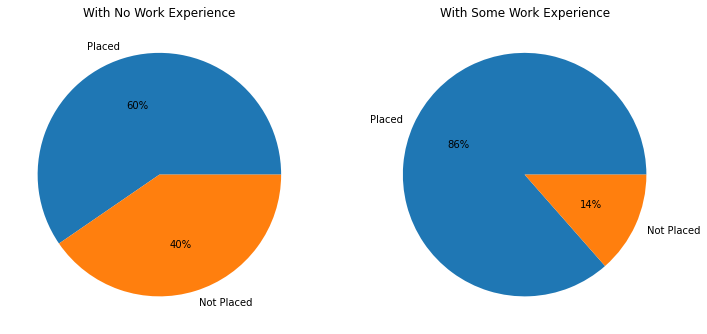

In [26]:
plt.figure(figsize=(12,6))

lb=['Placed','Not Placed']

plt.subplot(121)
plt.title('With No Work Experience')
plt.pie(we.iloc[:2],labels=lb,autopct='%.0f%%');

plt.subplot(122)
plt.title('With Some Work Experience')
plt.pie(we.iloc[2:],labels=lb,autopct='%.0f%%');


What is the average scores of students who got placed? And how different it is from the onces who didn't get placed?

In [32]:
o=pdf[pdf.status=='Placed'].groupby('degree_t').mean().drop(['sl_no','salary'],axis=1)
o

,ssc_p,hsc_p,degree_p,etest_p,mba_p
degree_t,,,,,
Comm&Mgmt,70.266176,70.477157,68.540000,72.789118,61.949706
Others,73.380000,69.800000,63.266000,72.600000,62.836000
Sci&Tech,75.139756,68.572195,69.907073,74.432683,64.114634


In [38]:
ol=pdf[pdf.status=='Not Placed'].groupby('degree_t').mean().drop(['salary','sl_no'],axis=1)
ol

,ssc_p,hsc_p,degree_p,etest_p,mba_p
degree_t,,,,,
Comm&Mgmt,55.730465,59.376977,60.659767,70.078372,61.665349
Others,56.600000,52.166667,58.500000,72.406667,60.156667
Sci&Tech,62.191111,58.127222,63.145556,67.476667,61.972778


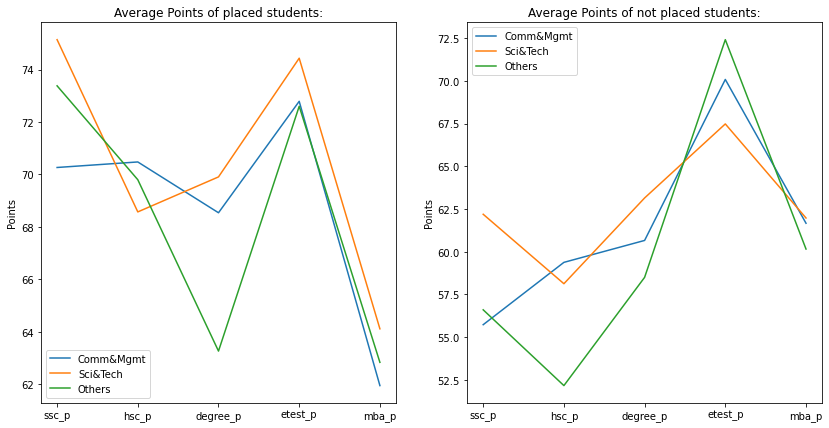

In [39]:
plt.figure(figsize=(14,7))

plt.subplot(121)
plt.title("Average Points of placed students:")
plt.ylabel("Points")
plt.plot(o.iloc[0],label='Comm&Mgmt')
plt.plot(o.iloc[2],label='Sci&Tech')
plt.plot(o.iloc[1],label='Others')
plt.legend();

plt.subplot(122)
plt.title("Average Points of not placed students:")
plt.ylabel("Points")
plt.plot(ol.iloc[0],label='Comm&Mgmt')
plt.plot(ol.iloc[2],label='Sci&Tech')
plt.plot(ol.iloc[1],label='Others')
plt.legend();

Did people with work Experience had a better chance at placements?

In [12]:
pdf[pdf.workex=='Yes'].groupby('specialisation').status.value_counts(normalize=True)*100

specialisation  status    
Mkt&Fin         Placed        92.156863
                Not Placed     7.843137
Mkt&HR          Placed        73.913043
                Not Placed    26.086957
Name: status, dtype: float64

What was the stats for people with no work experience?

In [13]:
pdf[pdf.workex=='No'].groupby('specialisation').status.value_counts(normalize=True)*100

specialisation  status    
Mkt&Fin         Placed        69.565217
                Not Placed    30.434783
Mkt&HR          Not Placed    50.000000
                Placed        50.000000
Name: status, dtype: float64

Did people with workex performed better in employbility test than ones with no experience?

In [14]:
pdf.groupby(['specialisation','workex']).etest_p.mean()

specialisation  workex
Mkt&Fin         No        74.958261
                Yes       74.787059
Mkt&HR          No        68.295833
                Yes       69.480870
Name: etest_p, dtype: float64

Specialization wise average salary of placed students

In [67]:
pdf[pdf.status=='Placed'].groupby(['degree_t','specialisation']).salary.mean()

degree_t   specialisation
Comm&Mgmt  Mkt&Fin           290044.117647
           Mkt&HR            255794.117647
Others     Mkt&Fin           300000.000000
           Mkt&HR            267333.333333
Sci&Tech   Mkt&Fin           322720.000000
           Mkt&HR            301937.500000
Name: salary, dtype: float64

Top 10 scorers in employbility test for Mkt&Fin specialization and for Mkt&HR specialization:

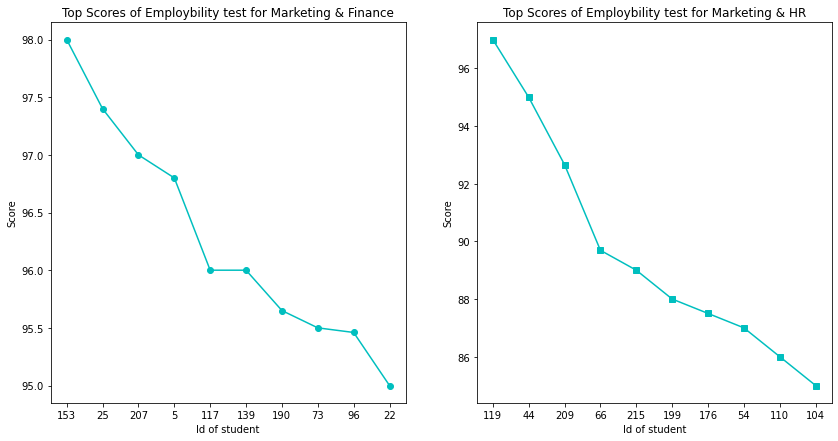

In [34]:
pdf.sl_no=pdf.sl_no.astype(str)

plt.figure(figsize=(14,7))

mfe=pdf[pdf.specialisation=='Mkt&Fin'].nlargest(10,'etest_p')
plt.subplot(121)
plt.plot(mfe.sl_no,mfe.etest_p,"o-c")
plt.title('Top Scores of Employbility test for Marketing & Finance');
plt.xlabel('Id of student');
plt.ylabel('Score');

mhe=pdf[pdf.specialisation=='Mkt&HR'].nlargest(10,'etest_p')
plt.subplot(122)
plt.plot(mhe.sl_no,mhe.etest_p, "s-c")
plt.title('Top Scores of Employbility test for Marketing & HR');
plt.xlabel('Id of student');
plt.ylabel('Score');

Let's have a scatterplot of all the employbility test scores wrt to salary the students got:

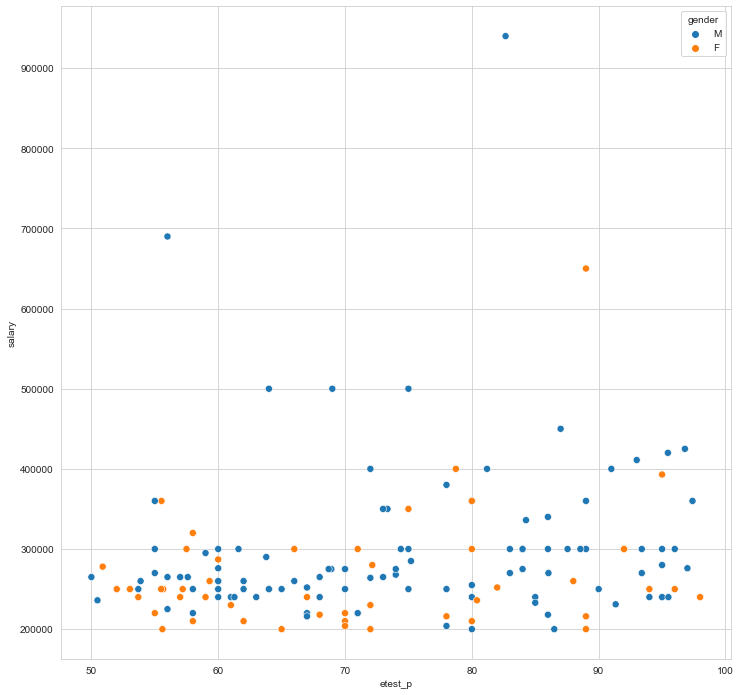

In [84]:
pp=pdf[pdf.status=='Placed']
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.scatterplot(x=pp.etest_p, # X-axis
                y=pp.salary,  # Y-axis
                hue=pp.gender,  # Dot color
                s=50);

We plot another scatterplot to visualize the employbility scores and which ones got placed and which ones didn't:

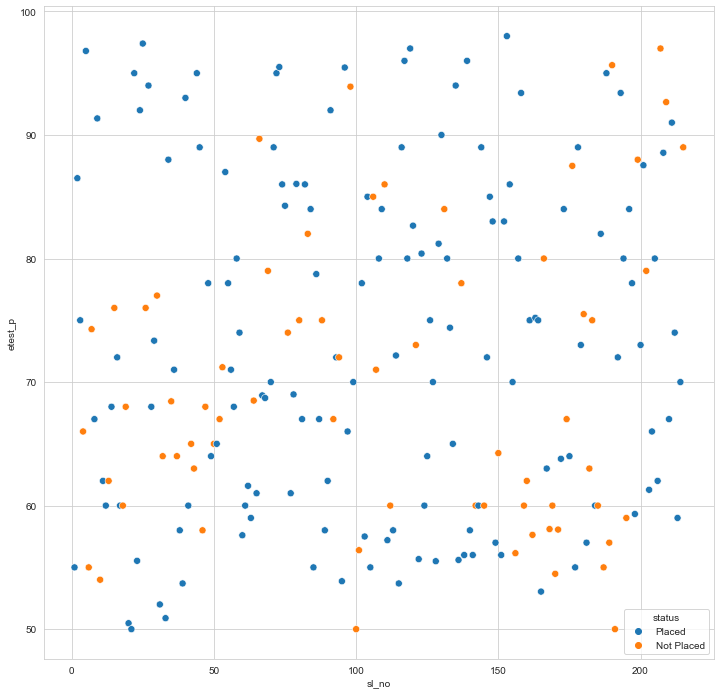

In [98]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=pdf.sl_no, # X-axis
                y=pdf.etest_p,  # Y-axis
                hue=pdf.status,  # Dot color
                s=50);

Let's have a scatterplot of all the employbility test scores wrt to salary the students got:

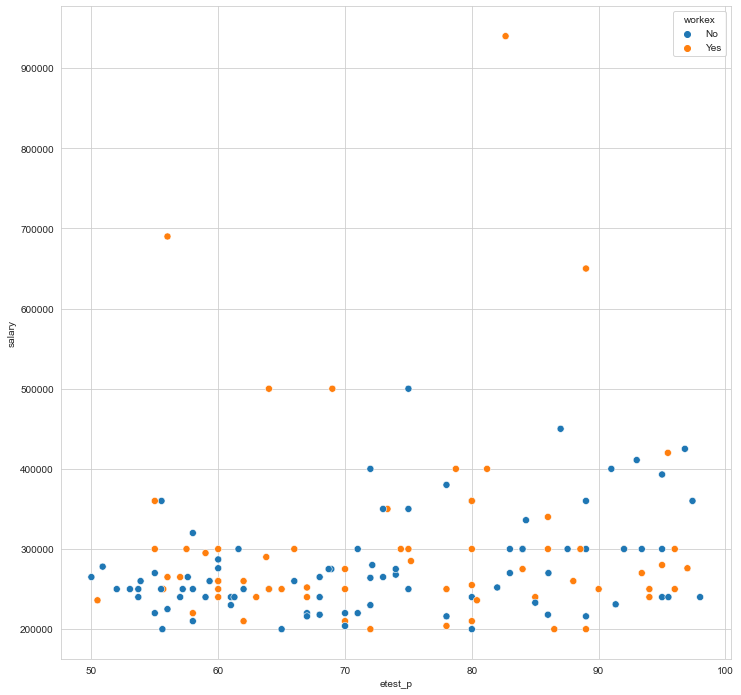

In [95]:
pp=pdf[pdf.status=='Placed']
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.scatterplot(x=pp.etest_p, # X-axis
                y=pp.salary,  # Y-axis
                hue=pp.workex,  # Dot color
                s=50);